# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# The data represents 17 marketing campaigns conducted between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.isna().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Observation: no missing data was found in any of the columns.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

`The business objective is to develop a predictive model that identifies the likelihood of a client subscribing to a bank term deposit following a marketing contact. This model aims to increase the efficiency of marketing campaigns by reducing the number of contacts made while maintaining or improving the success rate of term deposit subscriptions.`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: title={'center': 'Target Variable Distribution'}, xlabel='Client subscribed a term deposit?', ylabel='Frequency'>

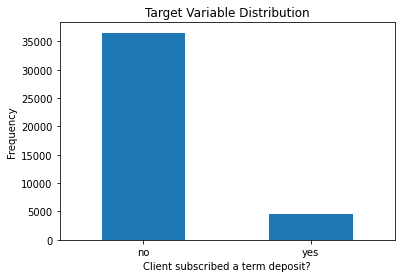

In [7]:
df.y.value_counts().plot(
    kind="bar", 
    title="Target Variable Distribution", 
    ylabel="Frequency", 
    xlabel="Client subscribed a term deposit?",
    rot=360
)

In [8]:
# calculate percentages

(df.y.value_counts()/df.y.shape[0]*100).to_frame().rename(columns={"count":"percentage"}).round(2)

,percentage
y,
no,88.73
yes,11.27


Observation: we can see that the target variable is highly unbalanced (`88%` of the data is `no`).
This will impact the training and models we are going to use.

In [9]:
import matplotlib.pyplot as plt

# plot distributions of numerical features
numerical_df = df.select_dtypes(include=['number'])
num_columns = numerical_df.shape[1]
num_columns
print("Numerical columns:", numerical_df.columns.to_list())
print("# of numerical columns:", num_columns)

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# of numerical columns: 10


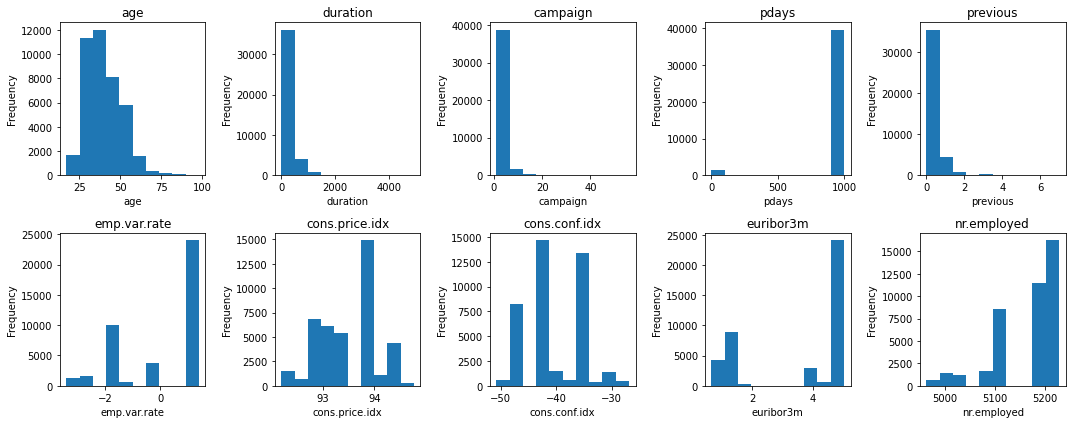

In [10]:
# creating a 2x5 grid layout of histograms
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# plotting each numerical column in a separate histogram
for i, col in enumerate(numerical_df.columns):
    numerical_df[col].plot(kind='hist', ax=axes[i], title=col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Observation: we can see normal distributions in almost all numerical columns. Column `pdays` should be inspected further since 999 means client was not contacted.

In [11]:
df.pdays.value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

The value 999 should be replaced with 0 since it might bias the model towards large numbers.

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_columns.remove("y")
print("Categorical columns:", categorical_columns)
print("# of categorical columns:", len(categorical_columns))

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# of categorical columns: 10


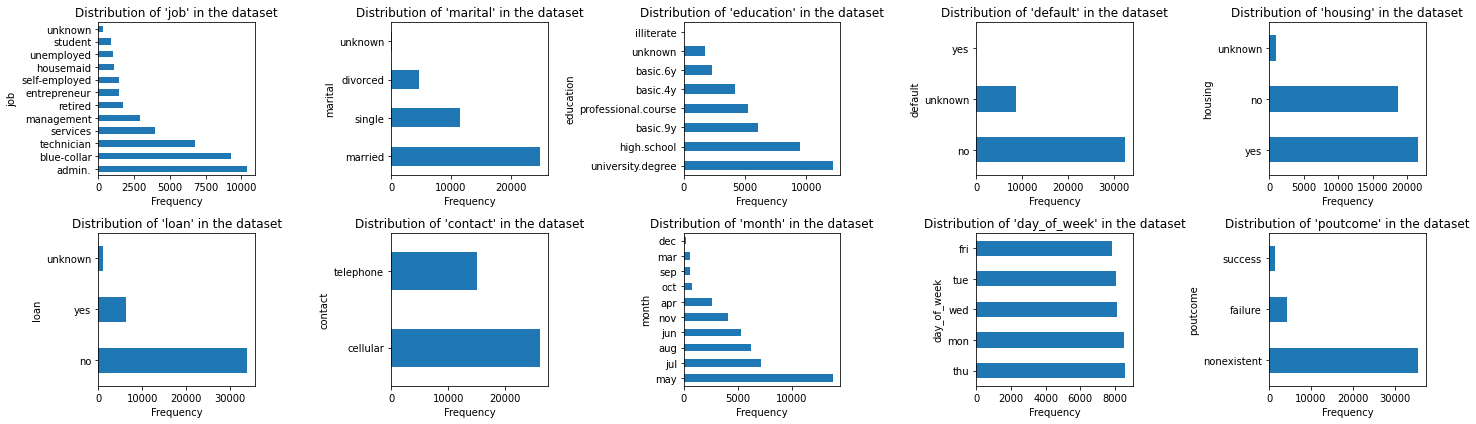

In [13]:
# plotting distributions of categorical columns
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.ravel()

# plotting each numerical column in a separate histogram
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind="barh", 
        title=f"Distribution of '{col}' in the dataset",
        ylabel=col,
        xlabel="Frequency",
        ax=axes[i]
    )
plt.tight_layout()
plt.show()

Observation: we can see that some distributions are highly unbalanced such as:

 - 'default'
 - 'loan'
 - 'month'
 - 'poutcome'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
bank_columns = df.columns.to_list()

# remove duration as per instructions since it affects the y variable
bank_columns.remove("duration")

# remove y from the X data
bank_columns.remove("y")

# get the target column
target = df.y.apply(lambda x: x=="yes")

# prepare the dataset
training_df = df[bank_columns]

# replace 999 with 0 in pdays
training_df['pdays'] = training_df.pdays.apply(lambda x: 0 if x==999 else x)

# ont-hot encode categorical columns
training_df = pd.get_dummies(training_df)
training_df

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27604\756607626.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['pdays'] = training_df.pdays.apply(lambda x: 0 if x==999 else x)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
1,57,1,0,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
2,37,1,0,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
3,40,1,0,0,1.1,93.994,-36.4,4.857,5191.0,True,...,False,False,False,True,False,False,False,False,True,False
4,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,False,True,False,False,False,False,False,True,False
41184,46,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,False,True,False,False,False,False,False,True,False
41185,56,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,False,True,False,False,False,False,False,True,False
41186,44,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,False,True,False,False,False,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
from sklearn.model_selection import train_test_split

# split the data
SEED = 12321
X_train, X_test, y_train, y_test = train_test_split(
    training_df, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28831, 62)
X_test shape: (12357, 62)
y_train shape: (28831,)
y_test shape: (12357,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [18]:
# calculate the total number of instances
total_instances = len(target)

# calculate the number of instances in the majority class
majority_class_count = target.value_counts().max()

# calculate the baseline accuracy
baseline_accuracy = majority_class_count / total_instances

# print the baseline accuracy
print(f"Baseline accuracy: {baseline_accuracy:.2%}")

Baseline accuracy: 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create the model
log_reg_model = LogisticRegression()

# fit on training data
log_reg_model.fit(X_train, y_train)

C:\Users\LAPTOP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [20]:
# make predictions on the test data
y_pred_test = log_reg_model.predict(X_test)
y_pred_train = log_reg_model.predict(X_train)

# evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on test set: {train_accuracy*100:0.3f}%")

# evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {test_accuracy*100:0.3f}%")

Accuracy on test set: 89.674%
Accuracy on test set: 90.240%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def evaluate_model(model, model_name, findings_df):
    print(f"Training {model_name} model..")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # predict on train and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # calculate accuracy on train and test sets
    train_accuracy = accuracy_score(y_train, train_pred)*100
    test_accuracy = accuracy_score(y_test, test_pred)*100
    
    # add results to findings_df
    findings_df.loc[len(findings_df)] = [
        model_name, 
        f"{train_time:.4f} seconds", 
        f"{train_accuracy:.4f}%", 
        f"{test_accuracy:.4f}%"
    ]

In [22]:
# create a findings DataFrame
findings_df = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# train logistic regression
logistic_regression_model = LogisticRegression()
evaluate_model(logistic_regression_model, 'Logistic Regression', findings_df)

# train knn model
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, 'K-Nearest Neighbors', findings_df)

# train decision tree model
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, 'Decision Tree', findings_df)

# train svm model
svm_model = SVC()
evaluate_model(svm_model, 'Support Vector Machine', findings_df)

Training Logistic Regression model..


C:\Users\LAPTOP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training K-Nearest Neighbors model..
Training Decision Tree model..
Training Support Vector Machine model..


In [23]:
findings_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.5790 seconds,89.6743%,90.2403%
1,K-Nearest Neighbors,0.0175 seconds,91.3045%,89.3583%
2,Decision Tree,0.2600 seconds,99.5526%,84.4137%
3,Support Vector Machine,16.3036 seconds,88.5679%,89.1236%


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Feature Exploration

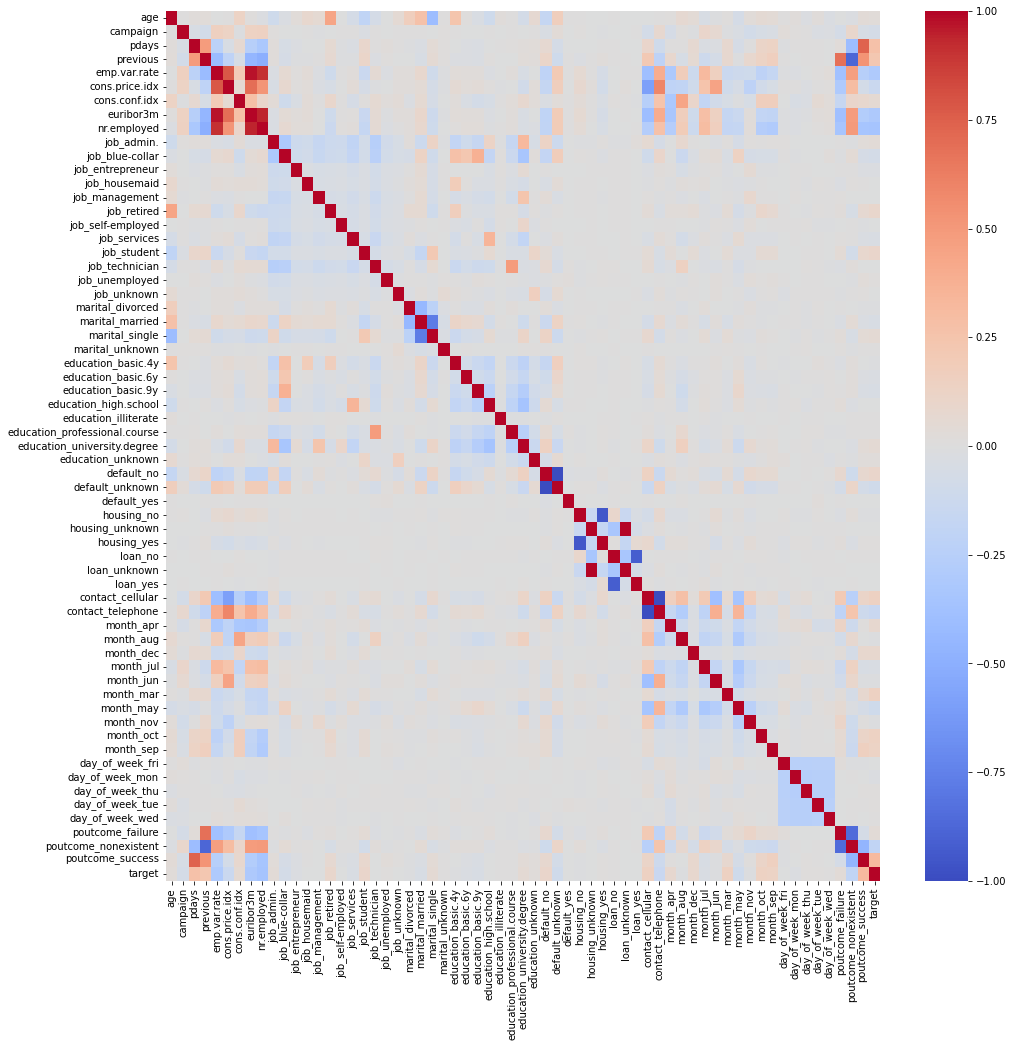

In [24]:
import seaborn as sns

# plot correlation between features and target
corr_df = training_df
corr_df['target'] = target
plt.figure(figsize=(16, 16))
sns.heatmap(corr_df.corr(), cmap='coolwarm')
plt.show()

In [25]:
# get mean corr per variable
# remove suffixes (result of )
corr = corr_df.corr()['target'].abs().sort_values(ascending=False).to_frame().reset_index()
corr['base_col'] = corr['index'].apply(lambda x: x.split("_")[0])

# printing sorted correlations
col_to_target_corr = corr.groupby('base_col')['target'].mean().sort_values(ascending=False).to_frame()

col_to_target_corr

,target
base_col,
target,1.000000
nr.employed,0.354678
euribor3m,0.307771
emp.var.rate,0.298334
pdays,0.267088
previous,0.230181
poutcome,0.180525
contact,0.144773
cons.price.idx,0.136211


In [26]:
threshold = 0.05
mask = col_to_target_corr.target<threshold

columns_to_discard = col_to_target_corr.index[mask].to_list()
columns_to_discard

['job', 'age', 'marital', 'education', 'day', 'housing', 'loan']

Observation: we can see that columns like `['job', 'age', 'marital', 'education', 'day_of_week', 'housing', 'loan']` do not contribute much to the target variable (very low correlation < 0.05).

We can also see that the columns with the highest correlation are:

 
 - nr.employed	(0.35)
 - pdays	(0.32)
 - euribor3m	(0.30)
 - emp.var.rate	(0.29)
 - previous	(0.23)


In [27]:
# discard columns with low correlation
columns_to_discard += ["duration", "y", "day_of_week"]
bank_columns = set(df.columns.to_list()) - set(columns_to_discard)

# print final features
bank_columns = list(bank_columns)
bank_columns

['month',
 'cons.conf.idx',
 'emp.var.rate',
 'default',
 'campaign',
 'pdays',
 'poutcome',
 'previous',
 'euribor3m',
 'cons.price.idx',
 'contact',
 'nr.employed']

In [28]:
training_df = df[bank_columns]
target = df.y.apply(lambda x: x=="yes")

# convert categorical columns
training_df = pd.get_dummies(training_df)

# replace 999 with 0 in pdays
training_df['pdays'] = training_df.pdays.apply(lambda x: 0 if x==999 else x)

# split the data
SEED = 12321
X_train, X_test, y_train, y_test = train_test_split(
    training_df, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

## Hyperparameter Tuning and Grid Search and adjusting performance metrics

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred) * 100,
        'precision': precision_score(y_true, y_pred) * 100,
        'recall': recall_score(y_true, y_pred) * 100,
        'f1': f1_score(y_true, y_pred) * 100,
    }

def evaluate_and_tune_model(model, model_name, param_grid, findings_df):
    print(f"Training {model_name} model with hyperparameter tuning..")
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # predict on train and test sets
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    
    # calculate performance metrics on train and test sets
    train_metrics = calculate_metrics(y_train, train_pred)
    test_metrics = calculate_metrics(y_test, test_pred)
    
    # append findings to findings_df
    findings_df.loc[len(findings_df)] = [
        model_name, 
        f"{train_time:.4f} seconds", 
        f"{train_metrics['accuracy']:.4f}%", 
        f"{test_metrics['accuracy']:.4f}%", 
        f"{test_metrics['precision']:.4f}%", 
        f"{test_metrics['recall']:.4f}%", 
        f"{test_metrics['f1']:.4f}%", 
    ]

In [30]:
tuning_findings_df = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [31]:
# define hyperparameter grids for each model
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced'],
}

# train logistic regression model with hyperparameter tuning
logistic_regression_model = LogisticRegression(random_state=SEED)
evaluate_and_tune_model(logistic_regression_model, 'Logistic Regression', param_grid_logistic, tuning_findings_df)
tuning_findings_df.iloc[-1].to_frame().T

Training Logistic Regression model with hyperparameter tuning..
Fitting 3 folds for each of 8 candidates, totalling 24 fits


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,5.2412 seconds,83.4588%,84.2033%,36.5368%,61.3839%,45.8079%


In [32]:
param_grid_knn = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance']
}

# train knn model with hyperparameter tuning
knn_model = KNeighborsClassifier()
evaluate_and_tune_model(knn_model, 'K-Nearest Neighbors', param_grid_knn, tuning_findings_df)
tuning_findings_df.iloc[-1].to_frame().T

Training K-Nearest Neighbors model with hyperparameter tuning..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
1,K-Nearest Neighbors,4.4235 seconds,90.4825%,90.1837%,61.4711%,26.1161%,36.6580%


In [33]:
param_grid_decision_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
# train decision tree model with hyperparameter tuning
decision_tree_model = DecisionTreeClassifier()
evaluate_and_tune_model(decision_tree_model, 'Decision Tree', param_grid_decision_tree, tuning_findings_df)
tuning_findings_df.iloc[-1].to_frame().T

Training Decision Tree model with hyperparameter tuning..
Fitting 3 folds for each of 24 candidates, totalling 72 fits


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
2,Decision Tree,0.9130 seconds,90.0801%,90.4669%,68.1223%,23.2143%,34.6282%


In [34]:
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['poly'],
    'class_weight': ['balanced']
}
svm_model = SVC()
# train support vector machine model with hyperparameter tuning
evaluate_and_tune_model(svm_model, 'Support Vector Machine', param_grid_svm, tuning_findings_df)
tuning_findings_df.iloc[-1].to_frame().T

Training Support Vector Machine model with hyperparameter tuning..
Fitting 3 folds for each of 2 candidates, totalling 6 fits


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
3,Support Vector Machine,97.8415 seconds,71.7249%,72.6147%,24.2424%,71.4286%,36.1991%


In [35]:
tuning_findings_df

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,5.2412 seconds,83.4588%,84.2033%,36.5368%,61.3839%,45.8079%
1,K-Nearest Neighbors,4.4235 seconds,90.4825%,90.1837%,61.4711%,26.1161%,36.6580%
2,Decision Tree,0.9130 seconds,90.0801%,90.4669%,68.1223%,23.2143%,34.6282%
3,Support Vector Machine,97.8415 seconds,71.7249%,72.6147%,24.2424%,71.4286%,36.1991%


Observation: depending on the performance metric, different models could be called the "best",

 - Using Test Accuracy: Decision Tree (90%)
 - Using F1 Score: Logistic Regression (45%)


While some models were able to get over 90% on both training and test sets, 
the target variable is highly unbalanced and if the models were to just say "no", it'd give them high accuracy on the training/test sets.

The target variable is highly unbalanced so this issue needs to be addressed AND/OR we need to use more complicated models to get a better F1 score.

##### Questions